# Introduction to Data Science
## Homework 5

Student Name: Yiyan Chen

Student Netid: yc2462
***

### Part 1: Naive Bayes (5 Points)

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful, and use the bias-variance tradeoff to justify its use. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

When using frequency alone, the probability of P(ei|c) may be overly optimistic. The smoothing parameter can adjustify the bias-variance tradeoff. Without the smoothing parameter, the model has high variance and no bias. Adding smoothness lower the variance which makes the prediction more precise. For example, in the reality, the spam emails is around 10%. When we randomly select the instances. It is totally different cases when we have two instances and twenty instances. If neither of the two instances contains ei feature, the p(ei|c) equals to 0, but the result may only due to the scarcity of instances. If 0 out of 20 contains no ei feature, the p(ei|c) equals zero is more convincing. After the Laplace smoothing, p in the first case is 0.25 while in the second case is 0.045 which is more close to the truth.

### Part 2: Text classification for sentiment analysis (20 Points)
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The data are located in "`data/imdb.csv`". The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1 (1 Point) \. Load the data into a pandas `DataFrame()`.

In [1]:
import pandas as pd
import numpy as np
import os

cwd = os.getcwd()
datadir = '/'.join(cwd.split('/')) + '/'
data = pd.read_csv(datadir + 'imdb.csv')

In [2]:
data.head(5)

,Text,Class
0,'One of the first of the best musicals Anchors...,P
1,'Visually disjointed and full of itself the di...,N
2,'These type of movies about young teenagers st...,P
3,'I would rather of had my eyes gouged out with...,N
4,'The title says it all. Tail Gunner Joe was a ...,N


2 (1 Point)\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [3]:
# Code here
data['Class'].replace('P', 1, inplace = True)
data['Class'].replace('N', 0, inplace = True)
#data['Class'].isnull().any()
data.dropna(inplace = True)

3 (2 Points)\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. Feel free to use any function from sklearn.

In [4]:
from sklearn.cross_validation import train_test_split

X = data['Text']
Y = data['Class']
#change dictionary to Series

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

/Users/cyian/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


4 (5 Points)\. Create a binary `CountVectorizer()` and a binary `TfidfVectorizer()`. Use the original single words as well as bigrams (in the same model). Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. Hint - look at the API documentation for both vectorizers to see what we mean by "binary."

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#from nltk.corpus import stopwords
#stops = set(stopwords.words('english'))
count_single = CountVectorizer(binary = True, stop_words='english')
count_bigram = CountVectorizer(binary = True, ngram_range = (1,2), stop_words='english')
count_single.fit(X_train)
count_bigram.fit(X_train)
X_train_count_single = count_single.transform(X_train)
X_test_count_single = count_single.transform(X_test)
X_train_count_bigram = count_bigram.transform(X_train)
X_test_count_bigram = count_bigram.transform(X_test)

In [7]:
tfid_single = CountVectorizer(binary = True, stop_words='english')
tfid_bigram = TfidfVectorizer(binary = True, ngram_range = (1,2), stop_words='english')
tfid_single.fit(X_train)
tfid_bigram.fit(X_train)
X_train_tfid_single = tfid_single.transform(X_train)
X_test_tfid_single = tfid_single.transform(X_test)
X_train_tfid_bigram = tfid_bigram.transform(X_train)
X_test_tfid_bigram = tfid_bigram.transform(X_test)

5 (6 Points)\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both vectorizers defined above. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

Extra credit (2 points): Do any of the options perform identically? If so, can you explain why?

In [8]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

0.92826687931951091

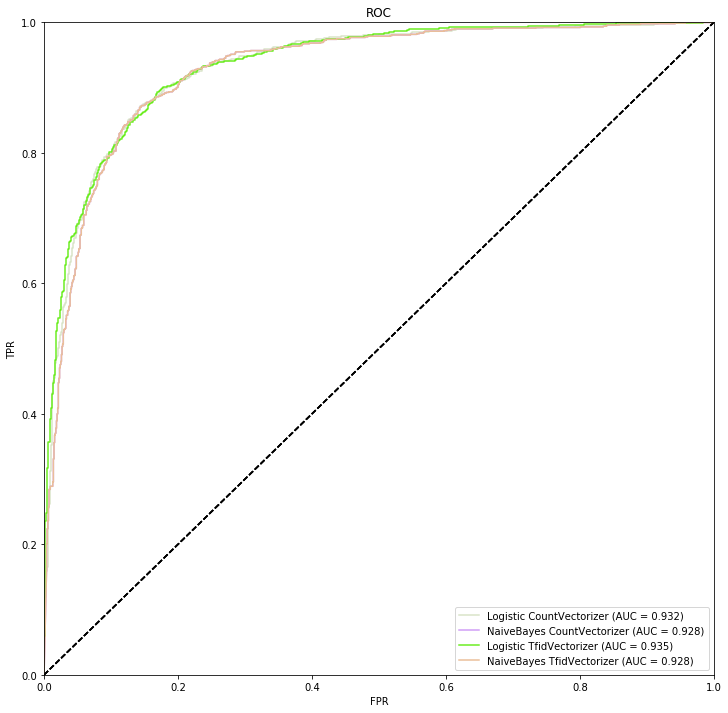

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
lg = LogisticRegression()
nb = BernoulliNB()
def plotROC(preds, truth, label_string):
    fpr, tpr, thres = metrics.roc_curve(truth, preds)
    roc_auc = metrics.auc(fpr, tpr)
    if roc_auc < 0.5:
        fpr, tpr, thres = metrics.roc_curve(truth, -1 * preds)
        roc_auc = metrics.auc(fpr, tpr)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color = c,label = label_string + ' (AUC = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    
    return roc_auc
#count * lg
lg.fit(X_train_count_bigram, Y_train)
lg_bigram_preds = lg.predict_proba(X_test_count_bigram)[:,1]
plotROC(lg_bigram_preds, Y_test, "Logistic CountVectorizer")
#count * nb
nb.fit(X_train_count_bigram, Y_train)
nb_bigram_preds = nb.predict_proba(X_test_count_bigram)[:,1]
plotROC(nb_bigram_preds, Y_test, "NaiveBayes CountVectorizer")
#tfid * lg
lg.fit(X_train_tfid_bigram, Y_train)
lg_tfid_preds = lg.predict_proba(X_test_tfid_bigram)[:,1]
plotROC(lg_tfid_preds, Y_test, "Logistic TfidVectorizer")
#tfid * nb
nb.fit(X_train_tfid_bigram, Y_train)
nb_tfid_preds = nb.predict_proba(X_test_tfid_bigram)[:,1]
plotROC(nb_tfid_preds, Y_test, "NaiveBayes TfidVectorizer")
# Code here

- Logistic TfidVectorizer does a better job. First of all, the TfidVectorizer does a better job because it extracts two words (ngram_range = (1,2)) and it can capture the negativitiness and positiveness more accurate. For the sense why Logistic performs better than Naive Bayes is that the correlations between words are not negligible. The independent assumption in Naive Bayes is violated. 
- extra credits: The NaiveBayes CountVectorizer and NaiveBayes TfidVectorizer work identically. Naive Bayes already takes account the probability of the text as inverse document frequency does in tfidvectorizer which means the NB CountVectorizer has taken the IDF into consideration. Hence, the two perform identically. 

5\. Use the model from question 4 that you think did the best job and predict the rating of the test data. Find 5 examples the should have been positive, but were incorrectly classified as negative. Print out the reviews below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [10]:
# Code here to display 5 incorrect reviews.
# The best model is logistic with tf/idf 
lg.fit(X_train_tfid_bigram, Y_train)
lg_tfid_preds = lg.predict(X_test_tfid_bigram)
example_list = []
for idx in range(100):
    if lg_tfid_preds[idx] == 0 and Y_test.iloc[idx] == 1:
        example_list.append(X_test.iloc[idx])

In [11]:
example_list[0:5]

["'There is this private campground in Plymouth Massachusetts thats been around since 1959. My grandparents were among its founders my parents had a site starting in 1965 and my two brothers have sites there now. (This doesnt have anything directly to do with the movie; bear with me.)  I spent summers at Blueberry Hill from when I was five years old to when I was eighteen and it is to people like me to whom this film speaks: the ones for whom a group camp in the woods was as my fiancée tells of me the good and happy place. If youve never experienced the lifestyle Indian Summer will probably be lost on you; dont bother. Its not quick-paced it doesnt have rapid cuts the plots arent in the least bit convoluted it has no explosions such dramatic tension as exists is mild there arent any A-list actors there are no rapid-fire quips just to show off how clever the scriptwriters are (other than perhaps Kimberley Williams killer line about how her fiancé shouldnt overwind his toys. That is not 

Explanation for the 5 reviews chosen here!
- (1) The reviewer used a lot of curse words in this one but the most important he/she said 'the only casting choices that were questionable", which "were quesionable" is highly possible to classified this review as a negative one, but in fact the reviewer is satisfied by the casting so the tune of this review should be positive. 
- (2) "feel offended" and "be stupid" help this review to be classified as a negative one, but the first sentence of this review shows the writer is very happy about this movie.
- (3) "trash it" may help this review classified as negative. 
- (4) "with unnecessary" is a negative word appears in a lot of negative reviews. This may explain why the review is misclassified.
- (5) "criticized with" is a strong negative word which helps the review misclassified as a negative one. 